In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



In [4]:
# ----------------------------------
#  Pink → Purple Palette
# ----------------------------------

pink_purple_palette = [
    "#fde0ef",  # soft blush
    "#f9a8d4",  # pastel pink
    "#ec4899",  # vibrant pink
    "#a21caf",  # medium purple
    "#581c87",  # deep plum
]


pink_purple_cmap = LinearSegmentedColormap.from_list(
    "pink_purple",
    pink_purple_palette,
    N=256
)

# ----------------------------------
# Global Seaborn Theme
# ----------------------------------

sns.set_theme(
    style="whitegrid",
    palette=pink_purple_palette,
    font_scale=1.1
)

# Background tones
plt.rcParams["figure.facecolor"] = "#fff7fb"
plt.rcParams["grid.color"] = "#f3c4e8"
plt.rcParams["axes.edgecolor"] = "#7a0177"
plt.rcParams["axes.labelcolor"] = "#4a044e"
plt.rcParams["xtick.color"] = "#4a044e"
plt.rcParams["ytick.color"] = "#4a044e"
plt.rcParams["text.color"] = "#4a044e"

# Improve title weight
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 14


In [5]:
# Set Working Directory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# Set Directory

os.chdir("/content/drive/MyDrive/DDS8555_Lesson5")
os.getcwd()

'/content/drive/MyDrive/DDS8555_Lesson5'

In [7]:
# Read in Train and Test Datasets

trData = pd.read_csv("train.csv")
teData = pd.read_csv("test.csv")

# **EDA**

In [8]:
trData.shape

(20758, 18)

In [9]:
trData.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
trData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
TARGET = "NObeyesdad"

trData[TARGET].value_counts()
trData[TARGET].value_counts(normalize=True)


,proportion
NObeyesdad,
Obesity_Type_III,0.194913
Obesity_Type_II,0.156470
Normal_Weight,0.148473
Obesity_Type_I,0.140187
Insufficient_Weight,0.121544
Overweight_Level_II,0.121495
Overweight_Level_I,0.116919


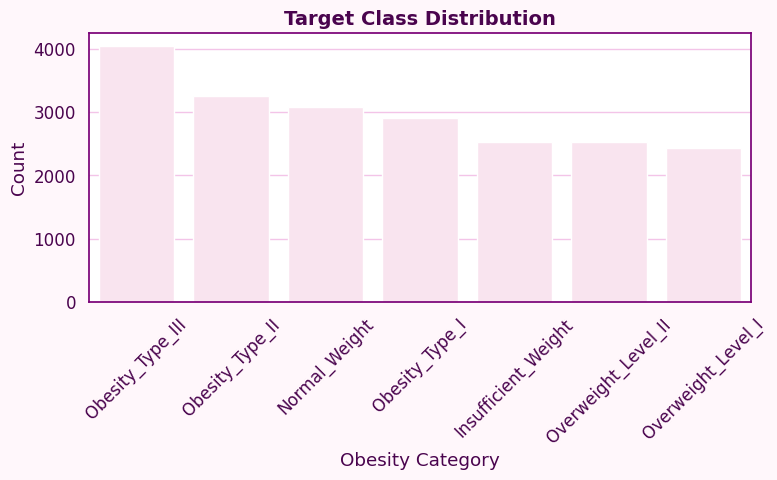

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=trData,
    x=TARGET,
    order=trData[TARGET].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Target Class Distribution")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [13]:
trData.isnull().sum().sort_values(ascending=False)


,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


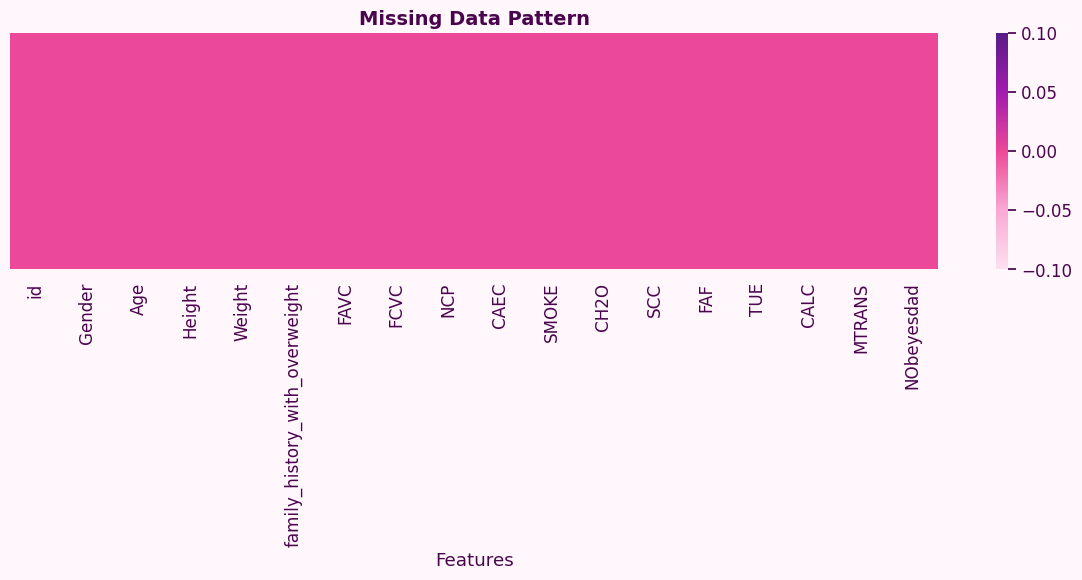

In [14]:
plt.figure(figsize=(12,6))

sns.heatmap(
    trData.isnull(),
    cmap=pink_purple_cmap,
    cbar=True,
    yticklabels=False
)

plt.title("Missing Data Pattern")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


In [15]:
trData.describe()


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


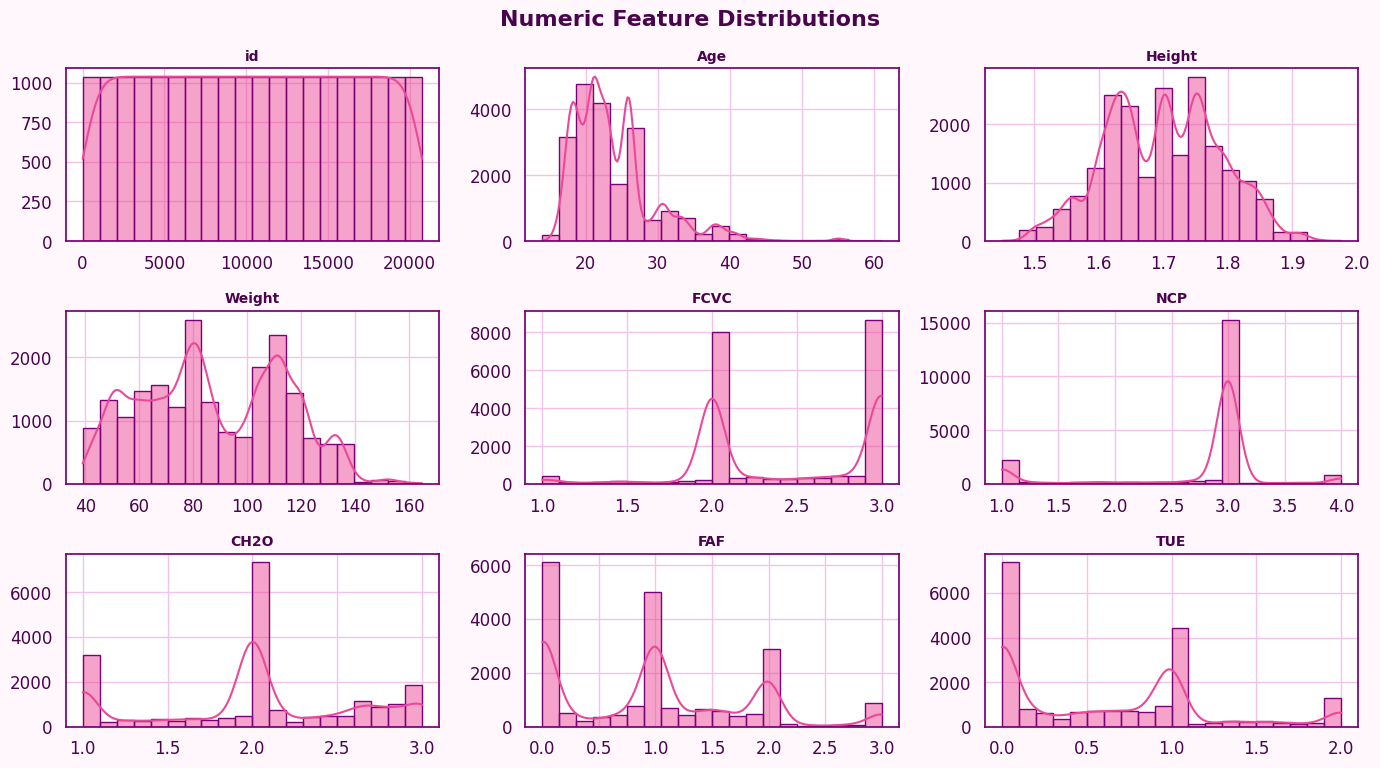

In [16]:
num_cols = trData.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)

    sns.histplot(
        trData[col],
        bins=20,
        kde=True,
        color="#ec4899",  # vibrant pink
        edgecolor="#7a0177"
    )

    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Numeric Feature Distributions", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [17]:
trData.duplicated().sum()


np.int64(0)

# **Model**

In [18]:
from sklearn.model_selection import train_test_split

TARGET = "NObeyesdad"

X = trData.drop(columns=[TARGET])
y = trData[TARGET]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## **Decision Tree**

Decision Tree Results
Accuracy: 0.8403179190751445
Macro F1: 0.8258970754528265
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91       505
      Normal_Weight       0.83      0.63      0.71       617
     Obesity_Type_I       0.84      0.82      0.83       582
    Obesity_Type_II       0.95      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.59      0.74      0.66       485
Overweight_Level_II       0.72      0.73      0.73       504

           accuracy                           0.84      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.85      0.84      0.84      4152



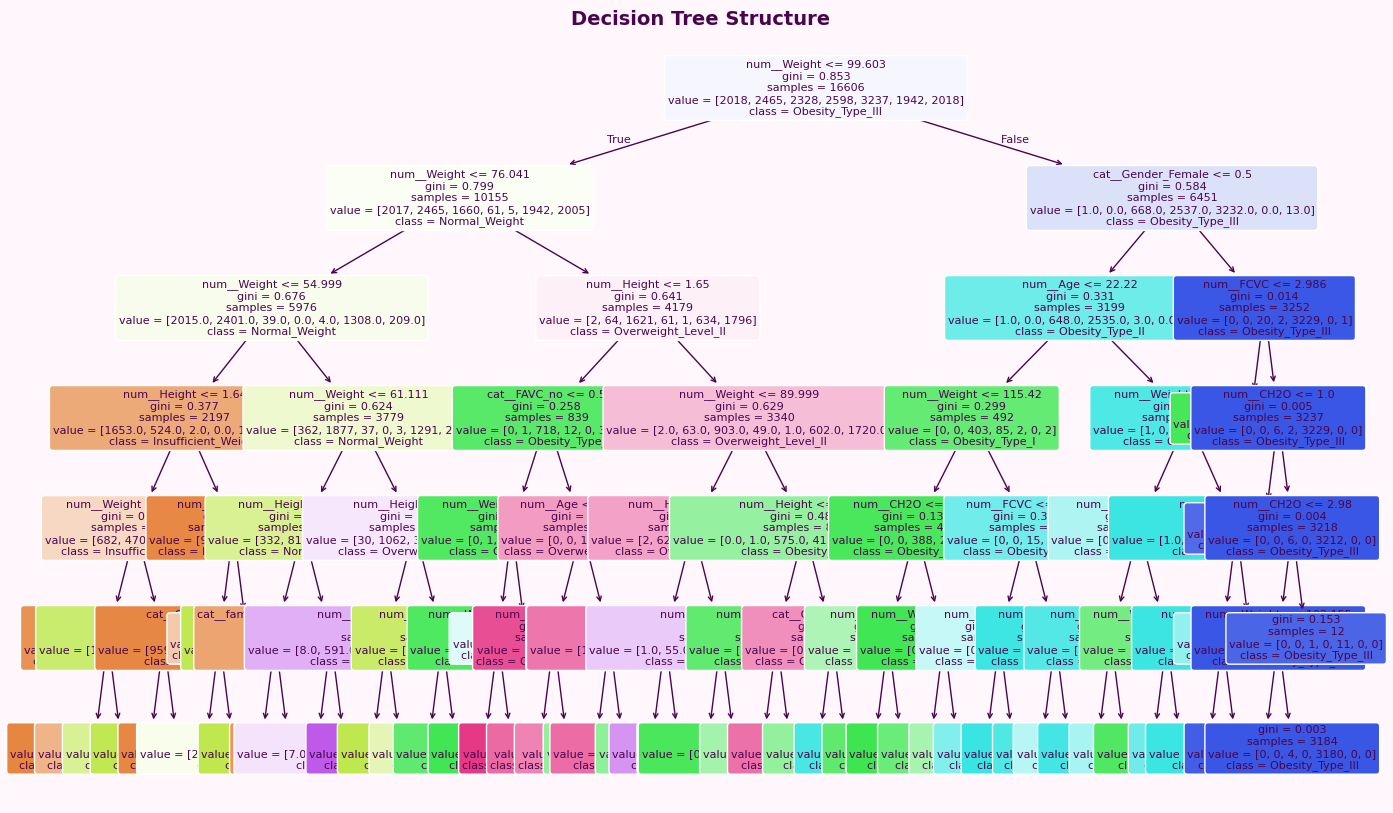

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Identify column types
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing
preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

dt_model = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=10,
        random_state=42
    ))
])

# Fit model
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_valid)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_valid, dt_preds))
print("Macro F1:", f1_score(y_valid, dt_preds, average="macro"))
print(classification_report(y_valid, dt_preds))

# -------------------------------
# 🌳 Plot the Tree Structure
# -------------------------------

# Extract fitted tree
tree_model = dt_model.named_steps["model"]

# Get feature names AFTER preprocessing
feature_names = dt_model.named_steps["prep"].get_feature_names_out()

plt.figure(figsize=(16,10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=tree_model.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree Structure")
plt.show()


## **Bagging**

Bagging Results
Accuracy: 0.8942678227360308
Macro F1: 0.8828743889965028
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       505
      Normal_Weight       0.86      0.87      0.86       617
     Obesity_Type_I       0.87      0.88      0.87       582
    Obesity_Type_II       0.96      0.96      0.96       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.77      0.74      0.76       485
Overweight_Level_II       0.79      0.79      0.79       504

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



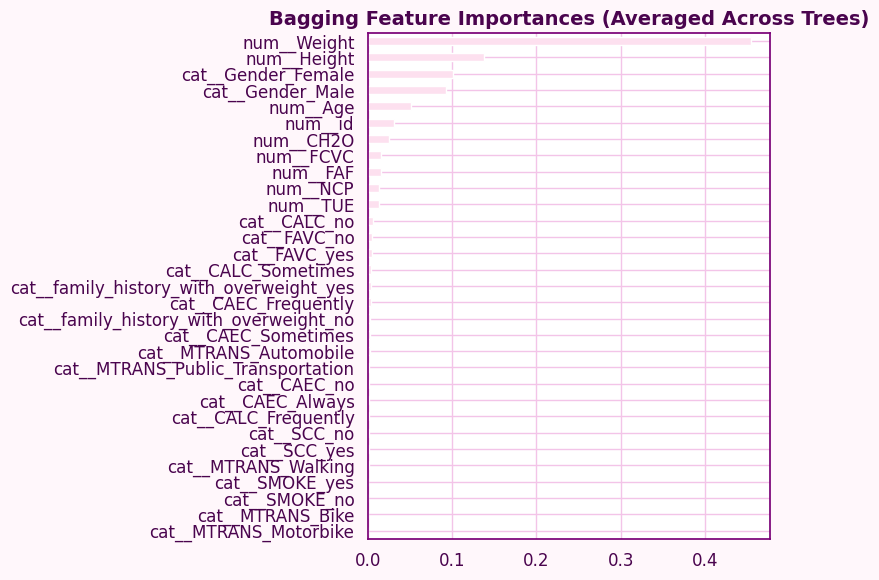

In [23]:
from sklearn.ensemble import BaggingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bag_model = Pipeline([
    ("prep", preprocess),
    ("model", BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit
bag_model.fit(X_train, y_train)
bag_preds = bag_model.predict(X_valid)

print("Bagging Results")
print("Accuracy:", accuracy_score(y_valid, bag_preds))
print("Macro F1:", f1_score(y_valid, bag_preds, average="macro"))
print(classification_report(y_valid, bag_preds))

# ------------------------------------------------
# 🌳 Averaged Feature Importances
# ------------------------------------------------

# Extract fitted Bagging model
bag_fitted = bag_model.named_steps["model"]

# Get feature names AFTER preprocessing
feature_names = bag_model.named_steps["prep"].get_feature_names_out()

# Average feature importances across all trees
importances = np.mean(
    [tree.feature_importances_ for tree in bag_fitted.estimators_],
    axis=0
)

# Create Series for plotting
feat_importances = pd.Series(importances, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(8,6))
feat_importances.plot(kind="barh")
plt.title("Bagging Feature Importances (Averaged Across Trees)")
plt.tight_layout()
plt.show()


## **Random Forest**

Random Forest Results
Accuracy: 0.8937861271676301
Macro F1: 0.8817970915306895
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93       505
      Normal_Weight       0.83      0.87      0.85       617
     Obesity_Type_I       0.88      0.89      0.89       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.80      0.71      0.75       485
Overweight_Level_II       0.78      0.80      0.79       504

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



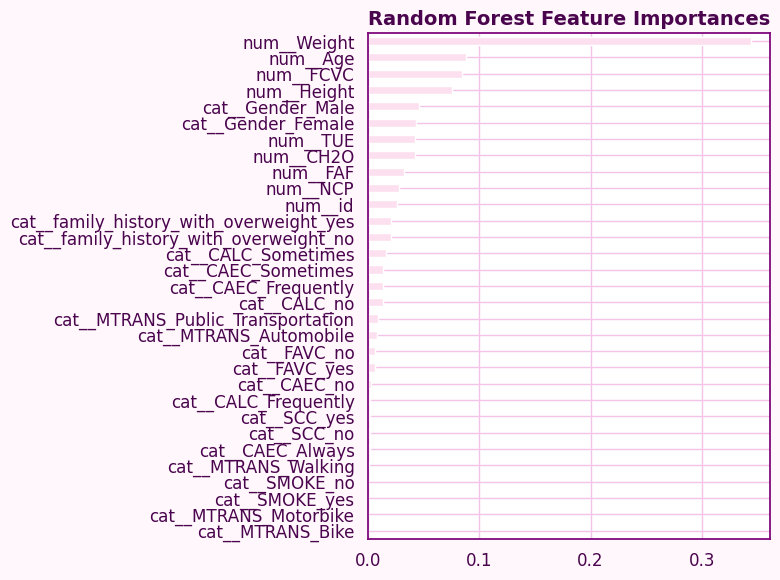

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=600,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit model
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_valid)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_valid, rf_preds))
print("Macro F1:", f1_score(y_valid, rf_preds, average="macro"))
print(classification_report(y_valid, rf_preds))

# ------------------------------------------------
# 🌲 Feature Importance Plot
# ------------------------------------------------

# Extract fitted Random Forest
rf_fitted = rf_model.named_steps["model"]

# Get feature names AFTER preprocessing
feature_names = rf_model.named_steps["prep"].get_feature_names_out()

# Extract importance scores
importances = rf_fitted.feature_importances_

# Create sorted Series
feat_importances = pd.Series(importances, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(8,6))
feat_importances.plot(kind="barh")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


## **Gradient Boosting**

Boosting Results
Accuracy: 0.9065510597302505
Macro F1: 0.8961069086851944
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.94       505
      Normal_Weight       0.87      0.89      0.88       617
     Obesity_Type_I       0.88      0.90      0.89       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.82      0.75      0.79       485
Overweight_Level_II       0.80      0.81      0.80       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



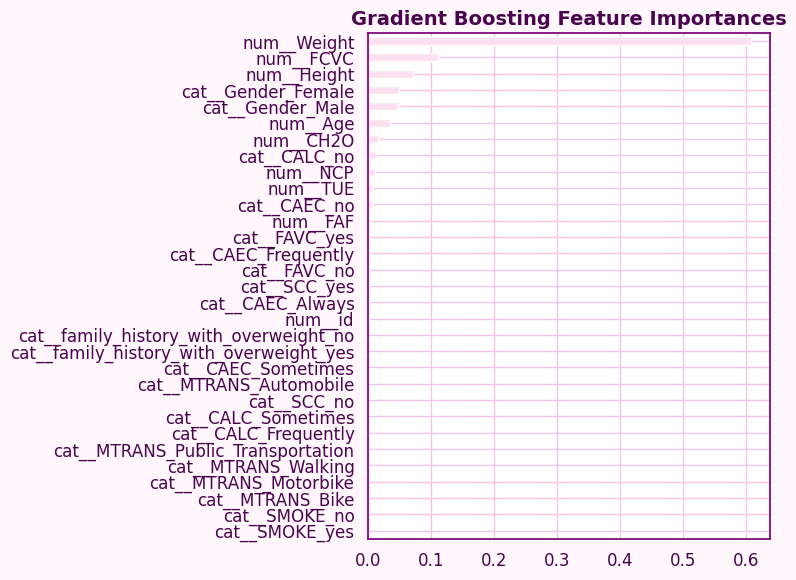

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt

gb_model = Pipeline([
    ("prep", preprocess),
    ("model", GradientBoostingClassifier(
        random_state=42
    ))
])

# Fit model
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_valid)

print("Boosting Results")
print("Accuracy:", accuracy_score(y_valid, gb_preds))
print("Macro F1:", f1_score(y_valid, gb_preds, average="macro"))
print(classification_report(y_valid, gb_preds))

# ------------------------------------------------
# 🚀 Feature Importance Plot
# ------------------------------------------------

# Extract fitted Gradient Boosting model
gb_fitted = gb_model.named_steps["model"]

# Get feature names AFTER preprocessing
feature_names = gb_model.named_steps["prep"].get_feature_names_out()

# Extract importance scores
importances = gb_fitted.feature_importances_

# Create sorted Series
feat_importances = pd.Series(importances, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(8,6))
feat_importances.plot(kind="barh")
plt.title("Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()


# **Model Comparison**

In [28]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging", "Random Forest", "Boosting"],
    "Accuracy": [
        accuracy_score(y_valid, dt_preds),
        accuracy_score(y_valid, bag_preds),
        accuracy_score(y_valid, rf_preds),
        accuracy_score(y_valid, gb_preds)
    ],
    "Macro_F1": [
        f1_score(y_valid, dt_preds, average="macro"),
        f1_score(y_valid, bag_preds, average="macro"),
        f1_score(y_valid, rf_preds, average="macro"),
        f1_score(y_valid, gb_preds, average="macro")
    ]
})

results.sort_values("Macro_F1", ascending=False)


,Model,Accuracy,Macro_F1
3,Boosting,0.906551,0.896107
1,Bagging,0.894268,0.882874
2,Random Forest,0.893786,0.881797
0,Decision Tree,0.840318,0.825897


# **Kaggle Submission**

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

TARGET = "NObeyesdad"
ID_COL = "id"

X = trData.drop(columns=[TARGET])
y = trData[TARGET]

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])


In [30]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf = RandomForestClassifier(
    n_estimators=600,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

gb = GradientBoostingClassifier(random_state=42)


In [31]:
def make_submission(model, filename, trData, teData, preprocess, target_col=TARGET, id_col=ID_COL):
    X_full = trData.drop(columns=[target_col])
    y_full = trData[target_col]

    pipe = Pipeline([
        ("prep", preprocess),
        ("model", model)
    ])

    pipe.fit(X_full, y_full)
    preds = pipe.predict(teData)


    sub = pd.DataFrame({
        id_col: teData[id_col],
        target_col: preds
    })

    sub.to_csv(filename, index=False)
    return sub.head()


In [32]:
make_submission(dt,  "submission_dt.csv",  trData, teData, preprocess)
make_submission(bag, "submission_bag.csv", trData, teData, preprocess)
make_submission(rf,  "submission_rf.csv",  trData, teData, preprocess)
make_submission(gb,  "submission_gb.csv",  trData, teData, preprocess)


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III


In [33]:
pd.read_csv("submission_rf.csv").head()


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
